<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

# Obtaining the Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vtor Kolokvium/Lab 3/train.csv")

In [7]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


# Describe the target value

Во ова податочно множество целта на target колоната на што ќе го научам модел ќе биде цената на куќите во индиската мерна единица Lac (1 lac = 100,000)

# Select is it classification or regression problem


Бидејќи моделот ќе погодува бројка (continious numerical variable), ова е регресионен проблем.

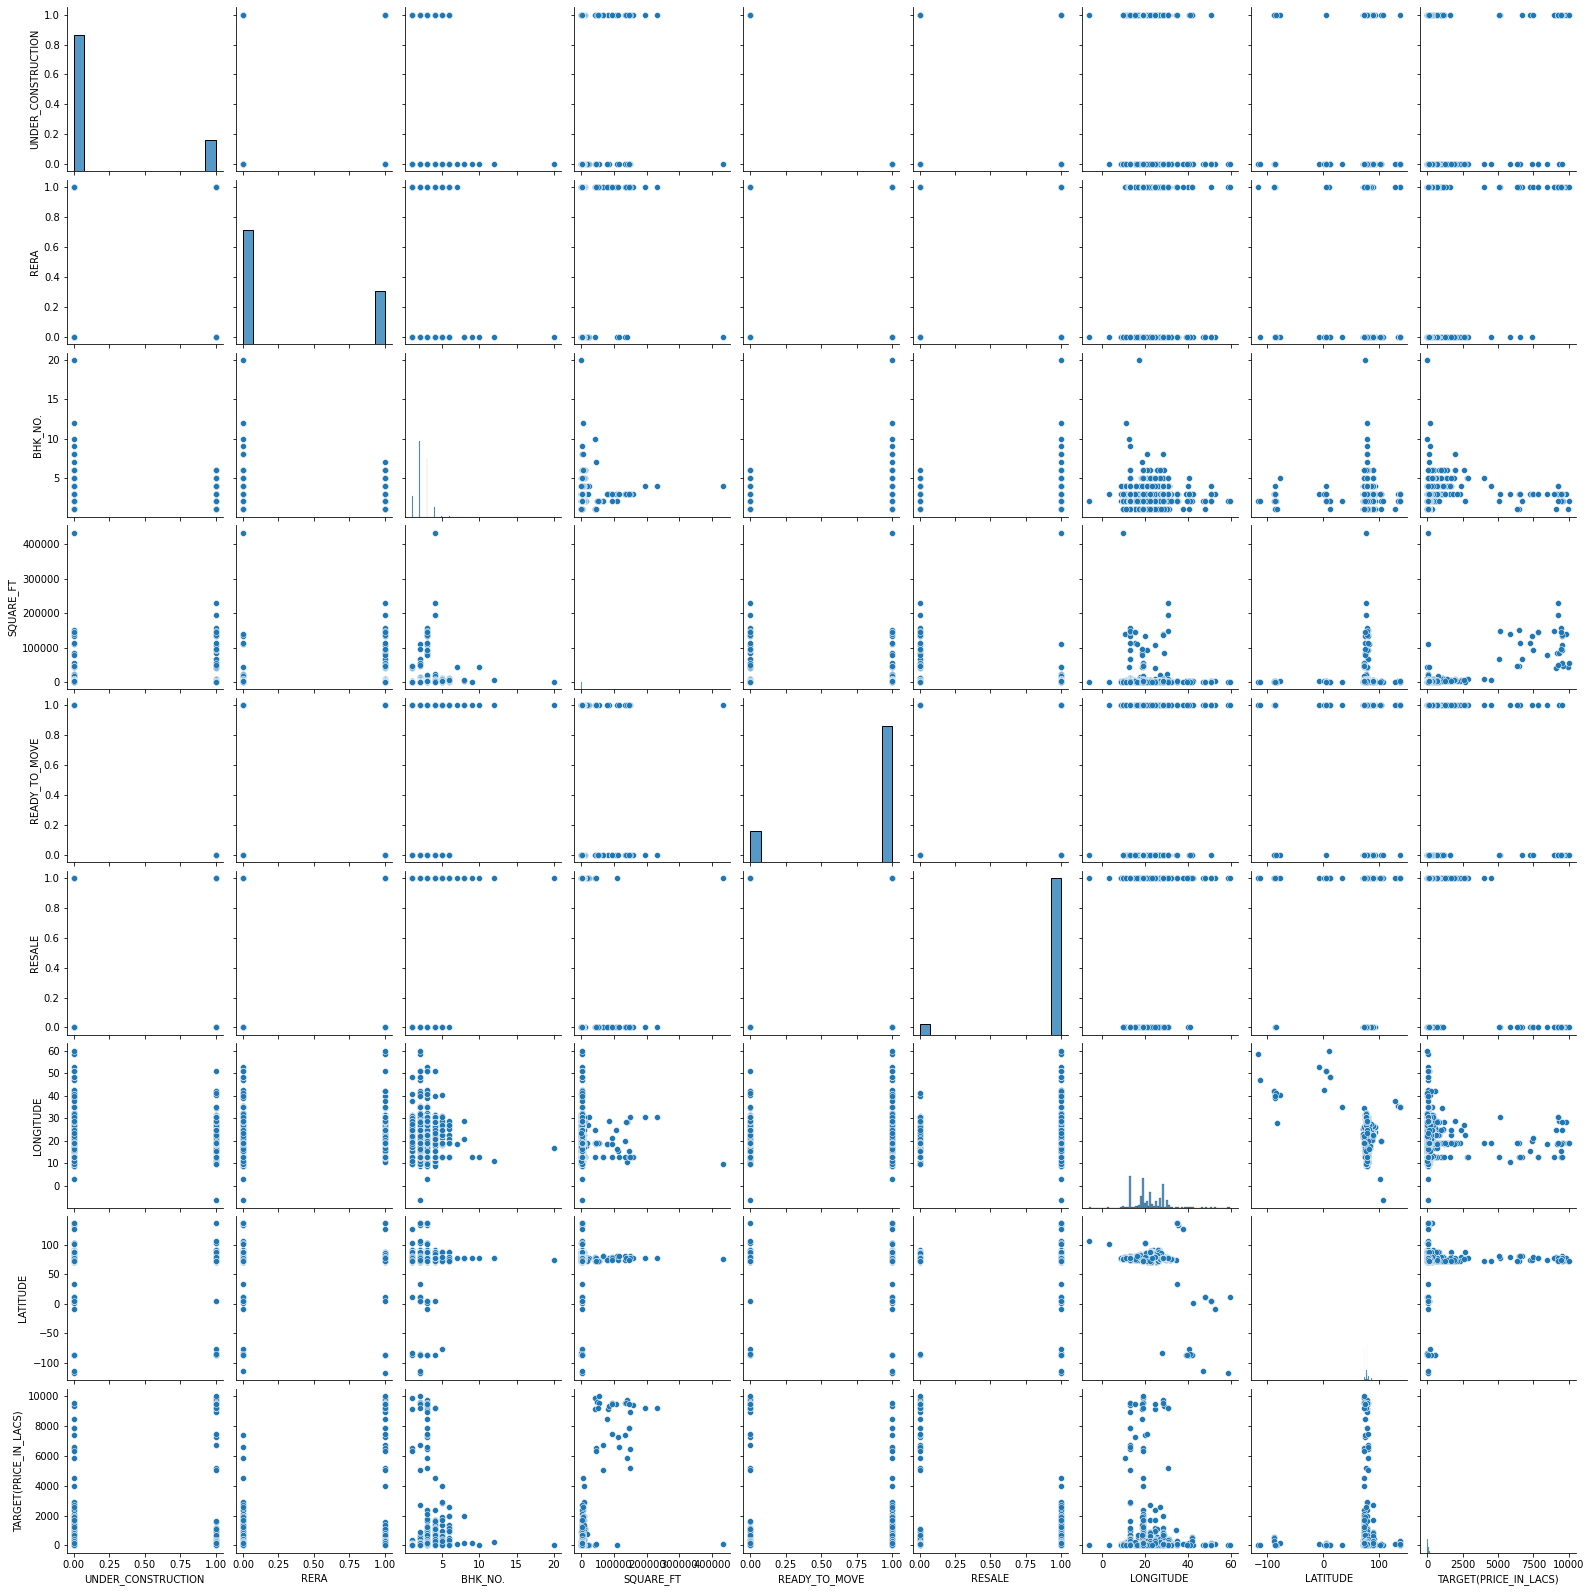

In [ ]:
import seaborn as sns

sns.pairplot(df.iloc[0:int(len(df)*0.25)])

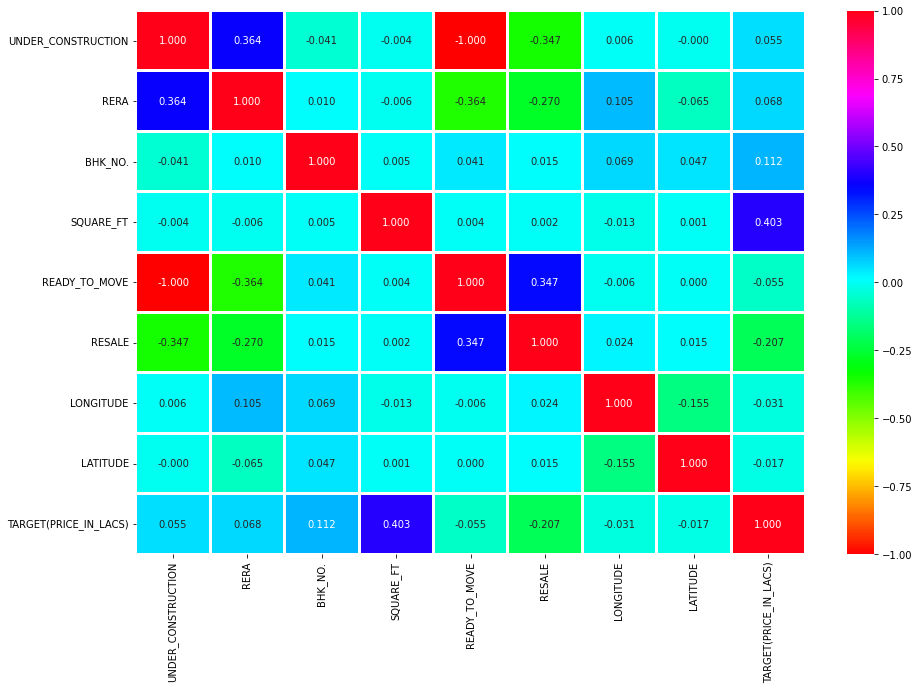

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

Од heatmap-ата може да забележиме дека цената на куќата највеќе зависи од квадратурата.

In [8]:
df.drop('ADDRESS',axis=1,inplace=True)
df.drop(columns = ['LONGITUDE','LATITUDE'],axis=1,inplace=True)

In [9]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,60.5
...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,67.0


In [10]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()
df["POSTED_BY"] = encoder.fit_transform(df["POSTED_BY"])
df["BHK_OR_RK"] = encoder.fit_transform(df["BHK_OR_RK"])
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,55.0
1,1,0,0,2,0,1275.000000,1,1,51.0
2,2,0,0,2,0,933.159722,1,1,43.0
3,2,0,1,2,0,929.921143,1,1,62.5
4,1,1,0,2,0,999.009247,0,1,60.5
...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,45.0
29447,2,0,0,2,0,769.230769,1,1,16.0
29448,1,0,0,2,0,1022.641509,1,1,27.1
29449,2,0,0,2,0,927.079009,1,1,67.0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1:]],test_size=0.2)

In [14]:
X_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
18721,2,0,1,4,0,2200.671391,1,1
8090,1,0,1,3,0,1575.013348,1,1
2635,2,0,0,3,0,1266.506603,1,1
7421,1,0,0,2,0,1095.290252,1,1
6769,2,0,0,2,0,750.144258,1,1
...,...,...,...,...,...,...,...,...
15611,1,0,0,2,0,891.931902,1,1
19510,1,0,0,2,0,1250.000000,1,1
11222,1,0,0,2,0,1250.000000,1,1
24864,1,0,0,2,0,1150.251618,1,1


In [15]:
Y_train

,TARGET(PRICE_IN_LACS)
18721,59.0
8090,59.0
2635,42.2
7421,100.0
6769,26.0
...,...
15611,24.1
19510,67.0
11222,37.9
24864,32.0


# Scailing the values

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.28790874, -0.46610784,  1.47442155, ..., -0.00900561,
         0.46610784,  0.27370713],
       [-0.65194102, -0.46610784,  1.47442155, ..., -0.00930935,
         0.46610784,  0.27370713],
       [ 1.28790874, -0.46610784, -0.67823208, ..., -0.00945913,
         0.46610784,  0.27370713],
       ...,
       [-0.65194102, -0.46610784, -0.67823208, ..., -0.00946714,
         0.46610784,  0.27370713],
       [-0.65194102, -0.46610784, -0.67823208, ..., -0.00951557,
         0.46610784,  0.27370713],
       [ 1.28790874, -0.46610784, -0.67823208, ..., -0.0094574 ,
         0.46610784,  0.27370713]])

# Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem - LINEAR REGRESSION

> First Way

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,Y_train)

In [19]:
r_sq = model.score(X_train,Y_train)

In [20]:
print("Coefficient of determination:",r_sq)

Coefficient of determination: 0.22093750177589488


In [21]:
Y_pred_lin = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_lin)

0.20727608935038033

In [22]:
model.coef_

array([[-1.26850752e+01,  8.01221254e+14,  1.01562500e+01,
         7.12812500e+01, -3.41015625e+00,  2.63223145e+02,
         8.01221254e+14, -1.33750000e+02]])

In [23]:
model.intercept_

array([141.70570034])

In [24]:
y_pred = model.predict(X_test)
y_pred

array([[182.20570034],
       [100.08070034],
       [ 78.20570034],
       ...,
       [ 40.70570034],
       [ 53.58070034],
       [590.36669606]])

> Second Way

In [25]:
import statsmodels.api as sm

In [26]:
x = sm.add_constant(X_train)

In [27]:
model = sm.OLS(Y_train, x)

In [28]:
results = model.fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TARGET(PRICE_IN_LACS)   R-squared:                       0.221
Model:                               OLS   Adj. R-squared:                  0.221
Method:                    Least Squares   F-statistic:                     954.2
Date:                   Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                           11:39:55   Log-Likelihood:            -1.8310e+05
No. Observations:                  23560   AIC:                         3.662e+05
Df Residuals:                      23552   BIC:                         3.663e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.7057      3.741     37.882      0.000     134.374     149.038
x1           -13.5661      5.187     -2.615      0.009     -23.733      -3.399
x2         -7.117e+12   9.69e+14     -0.007      0.994   -1.91e+15    1.89e+15
x3            10.1634      4.129      2.461      0.014       2.069      18.257
x4            71.2587      3.763     18.939      0.000      63.884      78.634
x5            -3.3860      3.748     -0.903      0.366     -10.732       3.960
x6           263.1861      3.744     70.287      0.000     255.847     270.525
x7         -7.117e+12   9.69e+14     -0.007      0.994   -1.91e+15    1.89e+15
x8          -133.8248      4.166    -32.125      0.000    -141.990    -125.660
==============================================================================
Omnibus:                    40703.311   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30308953.102
Skew:                          12.379   Prob(JB):                         0.00
Kurtosis:                     176.960   Cond. No.                     5.93e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Build Decision Tree model- DecisionTreeRegressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4)
regressor = regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_test)

In [31]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.7109263511235251


In [32]:
# import matplotlib.pyplot as plt
# plt.scatter(X_train, Y_train, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Regression Model')
# plt.xlabel('Level')
# plt.ylabel('Salary')
# plt.show()

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(Y_test, y_pred)

0.7109263511235251

In [35]:
df.iloc[:,:-1].columns.values

array(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE'], dtype=object)

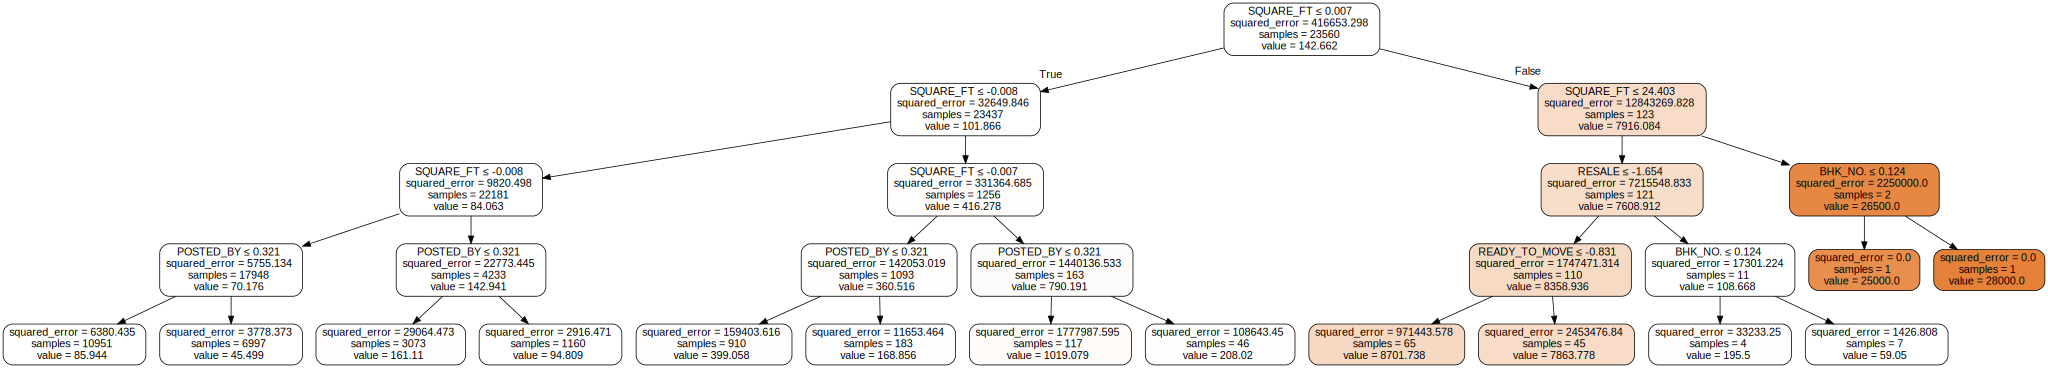

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(regressor,
                                out_file=None,
                                rounded=True,
                                special_characters=True,
                                feature_names=df.iloc[:,:-1].columns.values,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

# Compare the results

In [36]:
print("Accuracy for Decision Tree:",regressor.score(X_test, Y_test))

Accuracy for Decision Tree: 0.7109263511235251


In [37]:
print("Coefficient of determination of Linear Regression:",r_sq)

Coefficient of determination of Linear Regression: 0.22093750177589488


In [1]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 6.5 MB/s 
     |████████████████████████████████| 193.6 MB 59 kB/s 
     |████████████████████████████████| 139 kB 11.9 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=f495ac8cfd5fdd83a96c66c7ba647b5b25dd91a711bd338e3ede15b61d3126e8
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [42]:
from tpot import TPOTRegressor

In [44]:
tpot_reg = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot_reg.fit(X_train, Y_train)
# print(tpot_reg.score(X_test, Y_test))
# tpot_reg.export('tpot_regression_pipeline.py')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -35430.37837039774

Generation 2 - Current best internal CV score: -35430.37837039774

Generation 3 - Current best internal CV score: -35430.37837039774

Generation 4 - Current best internal CV score: -35430.37837039774

Generation 5 - Current best internal CV score: -34952.446045853445

Best pipeline: KNeighborsRegressor(AdaBoostRegressor(input_matrix, learning_rate=1.0, loss=exponential, n_estimators=100), n_neighbors=28, p=2, weights=distance)


NameError: ignored

In [45]:
print(tpot_reg.score(X_test, Y_test))
tpot_reg.export('tpot_regression_pipeline.py')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-124322.70038928895


In [49]:
tpot_reg = TPOTRegressor(generations=1, population_size=10, verbosity=2)
tpot_reg.fit(X_train, Y_train)
print(tpot_reg.score(X_test, Y_test))
tpot_reg.export('tpot_regression_pipeline.py')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -58002.03221839482

Best pipeline: AdaBoostRegressor(SelectFromModel(input_matrix, max_features=0.1, n_estimators=100, threshold=0.1), learning_rate=0.001, loss=exponential, n_estimators=100)
-199204.64910809664


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
import numpy as np
tpot_reg = TPOTRegressor(generations=1, population_size=10, verbosity=2)
tpot_reg.fit(X_train, Y_train.values.ravel())
print(tpot_reg.score(X_test, Y_test.values.ravel()))
tpot_reg.export('tpot_regression_pipeline.py')

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -87976.00485679672

Best pipeline: ElasticNetCV(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=13, min_samples_split=9, n_estimators=100), l1_ratio=0.7000000000000001, tol=0.01)
-134002.0920213627


In [53]:
Y_test

,TARGET(PRICE_IN_LACS)
21230,21.5
12681,48.0
26049,170.0
17033,25.0
22382,34.0
...,...
19493,35.0
28867,260.0
10496,48.8
20085,42.0


In [56]:
import numpy as np
tpot_reg = TPOTRegressor(generations=1, population_size=10, verbosity=2)
tpot_reg.fit(X_train, Y_train.values.ravel())
print(tpot_reg.score(X_test, Y_test.values.ravel()))
tpot_reg.export('tpot_regression_pipeline.py')

Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -92868.48899808449

Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.1, max_depth=1, min_child_weight=10, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)
-150685.2507827205
